In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

dataRedundancy = ctrl.Antecedent(np.arange(0, 11, 1), 'dataRedundancy')
storageDegradation = ctrl.Antecedent(np.arange(0, 11, 1), 'storageDegradation')
historicalError = ctrl.Antecedent(np.arange(0, 11, 1), 'historicalError')

errorLikelihood = ctrl.Consequent(np.arange(0, 21, 1), 'errorLikelihood')

dataRedundancy['low'] = fuzz.trimf(dataRedundancy.universe, [0, 0, 7])
dataRedundancy['medium'] = fuzz.trimf(dataRedundancy.universe, [0, 7, 14])
dataRedundancy['high'] = fuzz.trimf(dataRedundancy.universe, [7, 14, 21])

storageDegradation['low'] = fuzz.trimf(storageDegradation.universe, [0, 0, 7])
storageDegradation['medium'] = fuzz.trimf(storageDegradation.universe, [0, 7, 14])
storageDegradation['high'] = fuzz.trimf(storageDegradation.universe, [7, 14, 21])

historicalError['low'] = fuzz.trimf(historicalError.universe, [0, 0, 7])
historicalError['medium'] = fuzz.trimf(historicalError.universe, [0, 7, 14])
historicalError['high'] = fuzz.trimf(historicalError.universe, [7, 14, 21])

errorLikelihood['low'] = fuzz.trimf(errorLikelihood.universe, [0, 0, 10])
errorLikelihood['medium'] = fuzz.trimf(errorLikelihood.universe, [0, 10, 20])
errorLikelihood['high'] = fuzz.trimf(errorLikelihood.universe, [10, 20, 20])


C:\Users\Acer\anaconda3\Lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


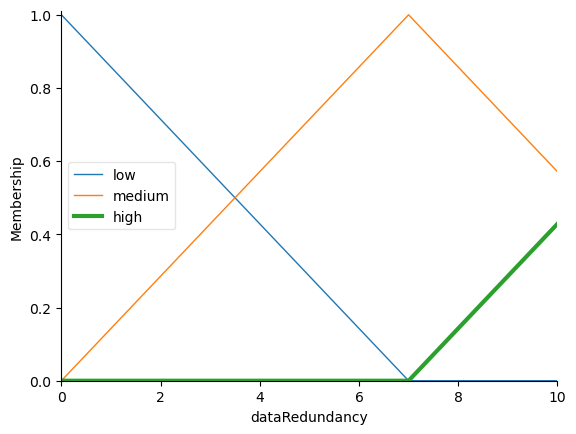

In [2]:
dataRedundancy['high'].view()

C:\Users\Acer\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


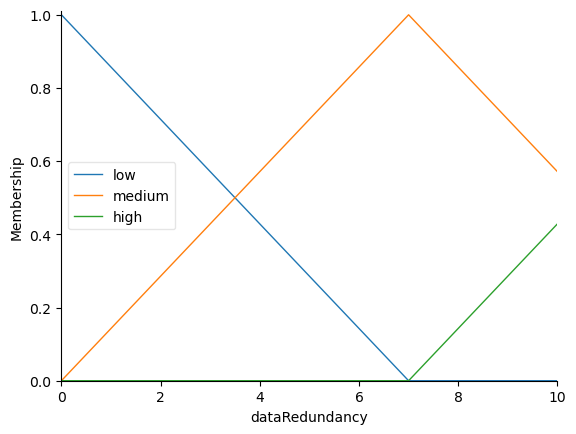

In [3]:
dataRedundancy.view()

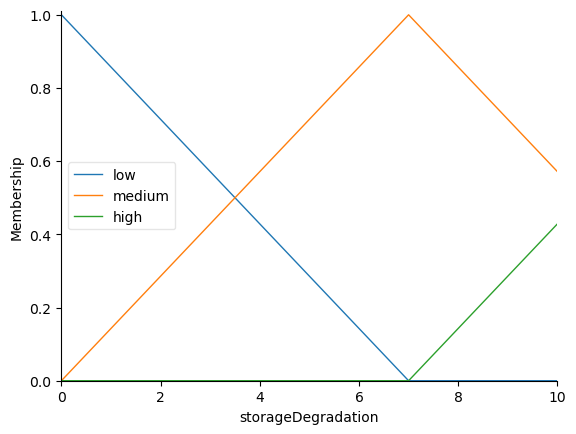

In [4]:
storageDegradation.view()

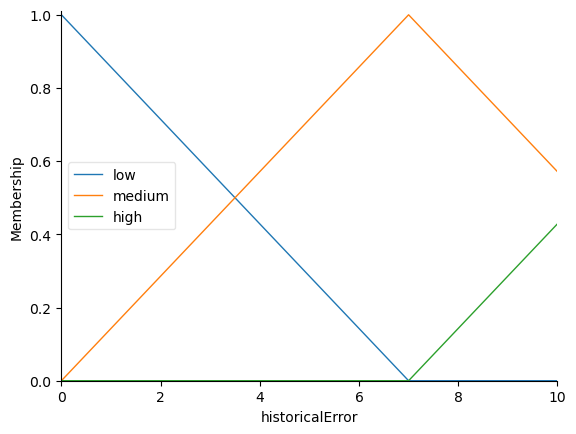

In [5]:
historicalError.view()

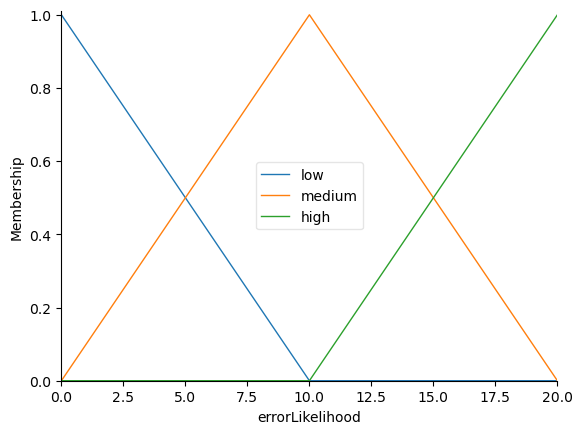

In [6]:
errorLikelihood.view()

In [7]:
rule1 = ctrl.Rule(dataRedundancy['low'] & storageDegradation['low'] & historicalError['low'],errorLikelihood['low'])
rule2 = ctrl.Rule(dataRedundancy['low'] & storageDegradation['low'] & historicalError['medium'],errorLikelihood['low'])
rule3 = ctrl.Rule(dataRedundancy['low'] & storageDegradation['low'] & historicalError['high'],errorLikelihood['medium'])
rule4 = ctrl.Rule(dataRedundancy['low'] & storageDegradation['medium'] & historicalError['low'],errorLikelihood['low'])
rule5 = ctrl.Rule(dataRedundancy['low'] & storageDegradation['medium'] & historicalError['medium'],errorLikelihood['medium'])
rule6 = ctrl.Rule(dataRedundancy['low'] & storageDegradation['medium'] & historicalError['high'],errorLikelihood['medium'])
rule7 = ctrl.Rule(dataRedundancy['low'] & storageDegradation['high'] & historicalError['low'],errorLikelihood['medium'])
rule8 = ctrl.Rule(dataRedundancy['low'] & storageDegradation['high'] & historicalError['medium'],errorLikelihood['medium'])
rule9 = ctrl.Rule(dataRedundancy['low'] & storageDegradation['high'] & historicalError['high'],errorLikelihood['high'])
rule10 = ctrl.Rule(dataRedundancy['medium'] & storageDegradation['low'] & historicalError['low'],errorLikelihood['low'])
rule11 = ctrl.Rule(dataRedundancy['medium'] & storageDegradation['low'] & historicalError['medium'],errorLikelihood['medium'])
rule12 = ctrl.Rule(dataRedundancy['medium'] & storageDegradation['low'] & historicalError['high'],errorLikelihood['medium'])
rule13 = ctrl.Rule(dataRedundancy['medium'] & storageDegradation['medium'] & historicalError['low'],errorLikelihood['medium'])
rule14 = ctrl.Rule(dataRedundancy['medium'] & storageDegradation['medium'] & historicalError['medium'],errorLikelihood['medium'])
rule15 = ctrl.Rule(dataRedundancy['medium'] & storageDegradation['medium'] & historicalError['high'],errorLikelihood['high'])
rule16 = ctrl.Rule(dataRedundancy['medium'] & storageDegradation['high'] & historicalError['low'],errorLikelihood['medium'])
rule17 = ctrl.Rule(dataRedundancy['medium'] & storageDegradation['high'] & historicalError['medium'],errorLikelihood['high'])
rule18 = ctrl.Rule(dataRedundancy['medium'] & storageDegradation['high'] & historicalError['high'],errorLikelihood['high'])
rule19 = ctrl.Rule(dataRedundancy['high'] & storageDegradation['low'] & historicalError['low'],errorLikelihood['medium'])
rule20 = ctrl.Rule(dataRedundancy['high'] & storageDegradation['low'] & historicalError['medium'],errorLikelihood['medium'])
rule21 = ctrl.Rule(dataRedundancy['high'] & storageDegradation['low'] & historicalError['high'],errorLikelihood['high'])
rule22 = ctrl.Rule(dataRedundancy['high'] & storageDegradation['medium'] & historicalError['low'],errorLikelihood['medium'])
rule23 = ctrl.Rule(dataRedundancy['high'] & storageDegradation['medium'] & historicalError['medium'],errorLikelihood['high'])
rule24 = ctrl.Rule(dataRedundancy['high'] & storageDegradation['medium'] & historicalError['high'],errorLikelihood['high'])
rule25 = ctrl.Rule(dataRedundancy['high'] & storageDegradation['high'] & historicalError['low'],errorLikelihood['high'])
rule26 = ctrl.Rule(dataRedundancy['high'] & storageDegradation['high'] & historicalError['medium'],errorLikelihood['high'])
rule27 = ctrl.Rule(dataRedundancy['high'] & storageDegradation['high'] & historicalError['high'],errorLikelihood['high'])

In [8]:
errorLikelihood_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27])
error = ctrl.ControlSystemSimulation(errorLikelihood_ctrl)

In [9]:
error.input['dataRedundancy'] = 10
error.input['storageDegradation'] = 10
error.input['historicalError'] = 10
error.compute()

10.872053872053874


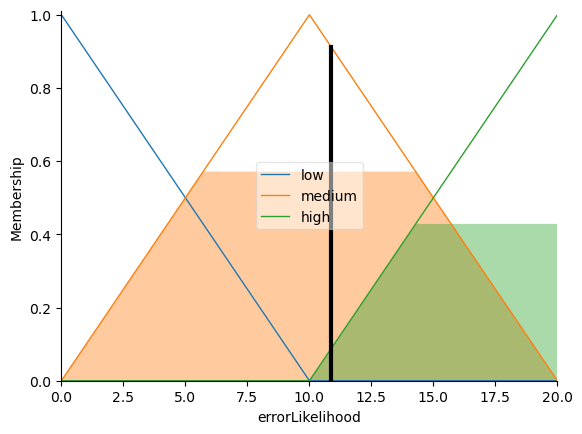

In [10]:
print(error.output['errorLikelihood'])
errorLikelihood.view(sim=error)

In [11]:
errorLikelihood_defuzz = error.output['errorLikelihood']  # No need for fuzz.defuzz because it is a scalar value
print(errorLikelihood_defuzz)

10.872053872053874


Enter Data Redundancy rate (0-10) : 1
Enter Storage Degradation rate (0-10) : 5
Enter Historical Error rate (0-10) : 2
7.390729081120542


(None, None)

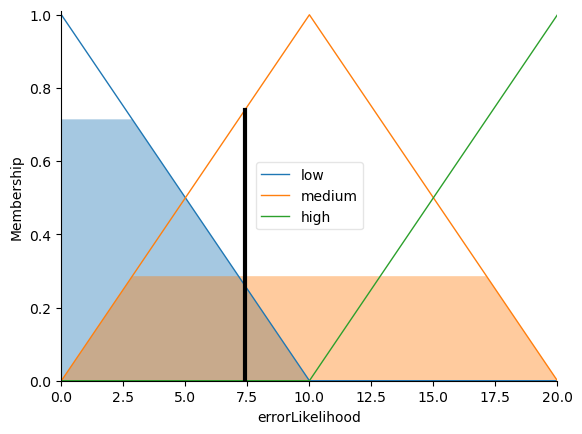

In [12]:
def getUserInput(dataRedundancy_input,storageDegradation_input,historicalError_input):
    error.input['dataRedundancy'] = dataRedundancy_input
    error.input['storageDegradation'] = storageDegradation_input
    error.input['historicalError'] = historicalError_input
    error.compute()
    print(error.output['errorLikelihood'])
    return error.compute(),errorLikelihood.view(sim=error)
    

dataRedundancy_input = float(input("Enter Data Redundancy rate (0-10) : "))
storageDegradation_input = float(input("Enter Storage Degradation rate (0-10) : "))
historicalError_input = float(input("Enter Historical Error rate (0-10) : "))

getUserInput(dataRedundancy_input,storageDegradation_input,historicalError_input)


Enter Data Redundancy rate (0-10) : 4
Enter Storage Degradation rate (0-10) : 5
Enter Historical Error rate (0-10) : 8
9.693746575878537
Severe ErrorLikelihood is High


(None, None)

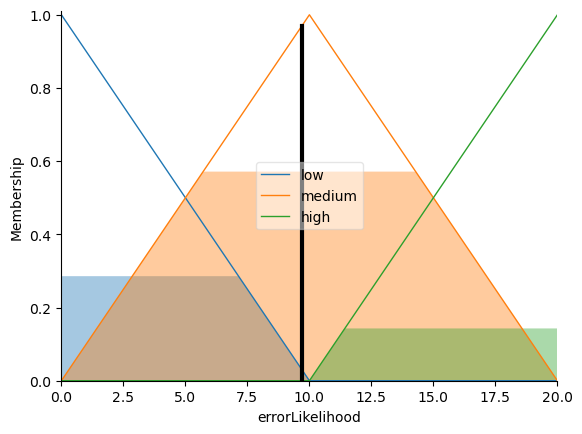

In [13]:
def getUserInput(dataRedundancy_input,storageDegradation_input,historicalError_input):
    error.input['dataRedundancy'] = dataRedundancy_input
    error.input['storageDegradation'] = storageDegradation_input
    error.input['historicalError'] = historicalError_input
    error.compute()
    print(error.output['errorLikelihood'])
    value = error.output['errorLikelihood']
    if(value >=0 and value<=4):
        print("Severe ErrorLikelihood is Low")
    elif(value >=4 and value<=7):
        print("Severe ErrorLikelihood is Medium")
    elif(value<=11):
        print("Severe ErrorLikelihood is High")
    return error.compute(),errorLikelihood.view(sim=error)
    
    

dataRedundancy_input = float(input("Enter Data Redundancy rate (0-10) : "))
storageDegradation_input = float(input("Enter Storage Degradation rate (0-10) : "))
historicalError_input = float(input("Enter Historical Error rate (0-10) : "))

getUserInput(dataRedundancy_input,storageDegradation_input,historicalError_input)
